In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
def print_vals(df, column_name):
    print("Mean: {:.3f}, Median: {:.3f}, Sample Std: {:.3f}, Pop. Std: {:.3f}, Sample Var: {:.3f}, Pop. Var: {:.3f}, Range: {:.3f}".
                                                format(df[column_name].mean(), df[column_name].median(), 
                                                       df[column_name].std(), np.std(df[column_name]), df[column_name].var(), 
                                                       np.var(df[column_name]), df[column_name].max() - df[column_name].min()))

In [3]:
print_vals(data, 'Pregnancies')

Mean: 3.845, Median: 3.000, Sample Std: 3.370, Pop. Std: 3.367, Sample Var: 11.354, Pop. Var: 11.339, Range: 17.000


In [4]:
print_vals(data, 'Glucose')

Mean: 120.895, Median: 117.000, Sample Std: 31.973, Pop. Std: 31.952, Sample Var: 1022.248, Pop. Var: 1020.917, Range: 199.000


In [5]:
print_vals(data, 'Insulin')

Mean: 79.799, Median: 30.500, Sample Std: 115.244, Pop. Std: 115.169, Sample Var: 13281.180, Pop. Var: 13263.887, Range: 846.000


In [6]:
print_vals(data, 'BloodPressure')

Mean: 69.105, Median: 72.000, Sample Std: 19.356, Pop. Std: 19.343, Sample Var: 374.647, Pop. Var: 374.159, Range: 122.000


In [7]:
print_vals(data, 'SkinThickness')

Mean: 20.536, Median: 23.000, Sample Std: 15.952, Pop. Std: 15.942, Sample Var: 254.473, Pop. Var: 254.142, Range: 99.000


In [8]:
print_vals(data, 'BMI')

Mean: 31.993, Median: 32.000, Sample Std: 7.884, Pop. Std: 7.879, Sample Var: 62.160, Pop. Var: 62.079, Range: 67.100


<AxesSubplot:ylabel='Frequency'>

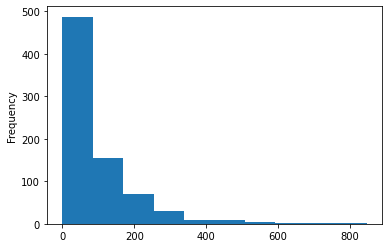

In [9]:
data['Insulin'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

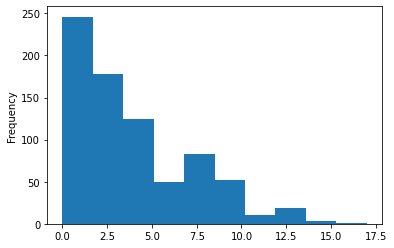

In [10]:
data['Pregnancies'].plot.hist()

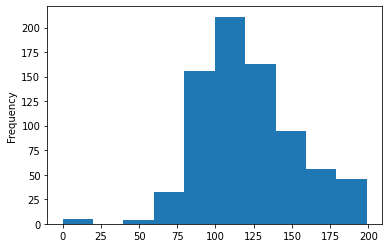

In [11]:
data['Glucose'].plot.hist()
plt.savefig('Glucose Histogram.png')

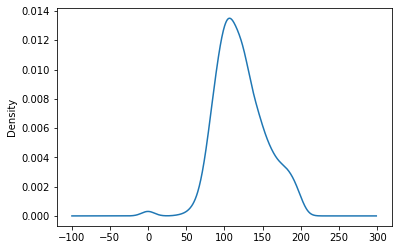

In [12]:
data['Glucose'].plot.kde()
plt.savefig('Glucose Density Graph.png')

<AxesSubplot:ylabel='Density'>

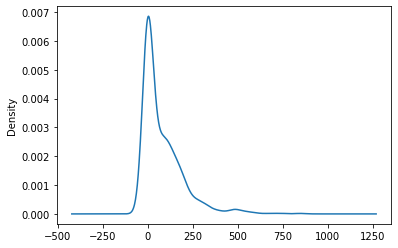

In [13]:
data['Insulin'].plot.kde()

<AxesSubplot:ylabel='Density'>

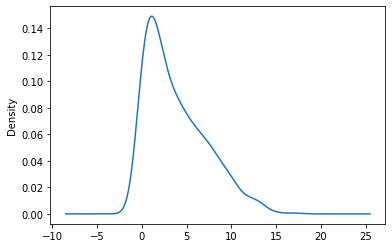

In [14]:
data['Pregnancies'].plot.kde()

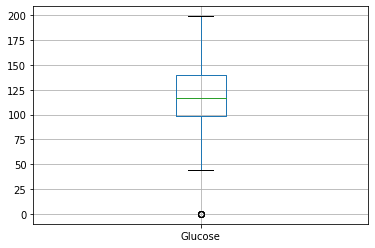

In [15]:
data.boxplot(column=['Glucose'])
plt.savefig('Glucose Boxplot.png')

<AxesSubplot:>

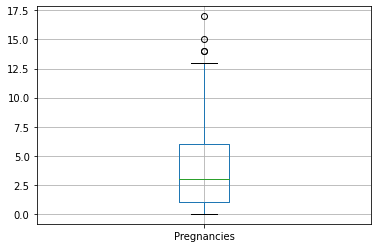

In [16]:
data.boxplot(column=['Pregnancies'])

<AxesSubplot:>

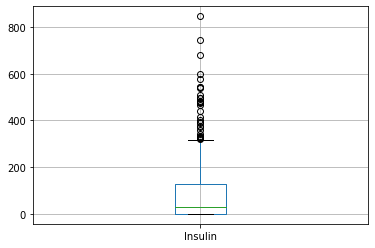

In [17]:
data.boxplot(column=['Insulin'])

In [18]:
def construct_reduced_pop(df, column):
    return pd.DataFrame([df[column].min(), df[column].max(), df[column].median(), df[column].mean(), df[column].quantile(.25),
                       df[column].quantile(.75), df[column].quantile(.15), df[column].quantile(.85)])

In [19]:
reduced_pop = construct_reduced_pop(data, 'Glucose')
reduced_pop

,0
0,0.000000
1,199.000000
2,117.000000
3,120.894531
4,99.000000
5,140.250000
6,91.000000
7,156.000000


In [20]:
print_vals(reduced_pop, 0)

Mean: 115.393, Median: 118.947, Sample Std: 57.903, Pop. Std: 54.163, Sample Var: 3352.725, Pop. Var: 2933.634, Range: 199.000


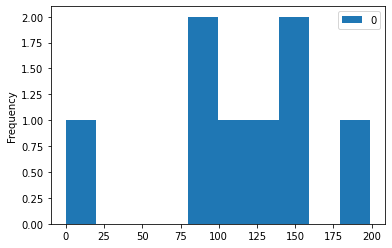

In [21]:
reduced_pop.plot.hist()
plt.savefig('Reduced Pop Histogram.png')

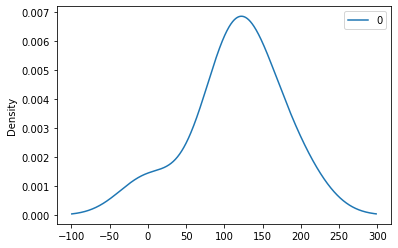

In [22]:
reduced_pop.plot.kde()
plt.savefig('Reduced Pop Density.png')

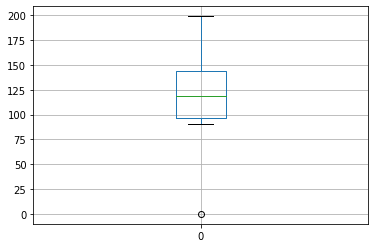

In [23]:
reduced_pop.boxplot()
plt.savefig('Reduced Pop Boxplot.png')

In [24]:
reduced_pop.mean()[0]

115.39306640625

In [25]:
reduced_pop.var()[0]

3352.7245698656357

In [26]:
np.var(reduced_pop)[0]

2933.633998632431

In [27]:
from itertools import combinations

def sampling_dist_sample_mean(df, size, n=3):
    # Get all possible combinations of indices of array for samples (size choose n (8 choose 3))
    combos = combinations(range(size), n)
    means = []
    var = []
    dist = []
    
    # Calculations on each sample 
    for c in combos:
        means.append(df.iloc[list(c)].mean()[0])
        var.append(df.iloc[list(c)].var()[0])
        dist.append(np.array(df.iloc[list(c)]))
        #print(df.iloc[list(c)])
        #print(df.iloc[list(c)].mean())
    #print(len(list(combos)))
    return means, dist, var

In [28]:
means, dist, var = sampling_dist_sample_mean(reduced_pop, 8, 3)

In [29]:
np.mean(means)

115.39306640625

In [30]:
np.var(means)

698.484285388674

In [31]:
pd.DataFrame(means).var()

0    711.184
dtype: float64

In [32]:
np.mean(var)

3352.7245698656347

<AxesSubplot:ylabel='Density'>

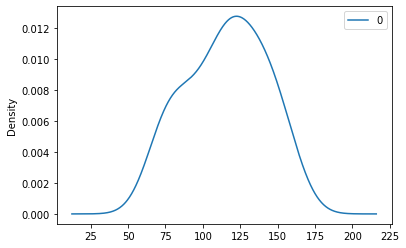

In [33]:
pd.DataFrame(means).plot.kde()

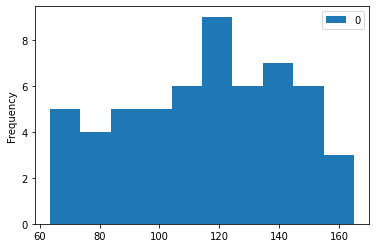

In [34]:
pd.DataFrame(means).plot.hist()
plt.savefig('Sampling Dist of Sample Mean.png')

In [35]:
def var_single_sample(n, N, sample):
    s_squared = pd.DataFrame(sample).var()[0]
    print("s^2: {:.2f}".format(s_squared))
    return (1 - (n/N)) * (s_squared / n)

In [36]:
dist[5]

array([[  0.],
       [199.],
       [156.]])

In [37]:
var_single_sample(3, 8, dist[5])

s^2: 10964.33


2284.2361111111113

In [38]:
var_single_sample(3, 8, dist[10])

s^2: 6591.00


1373.125

In [39]:
var_single_sample(3, 8, dist[30])

s^2: 2525.52


526.1501736111111

In [40]:
var_single_sample(3, 8, dist[25])

s^2: 1682.33


350.4861111111111

In [41]:
(var_single_sample(3, 8, dist[5]) + var_single_sample(3, 8, dist[10]) + var_single_sample(3, 8, dist[30])) / 3

s^2: 10964.33
s^2: 6591.00
s^2: 2525.52


1394.5037615740741

<AxesSubplot:>

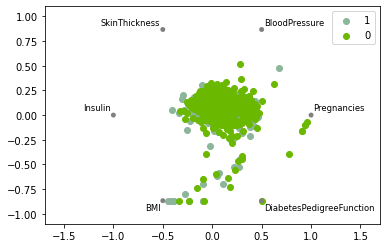

In [42]:
pd.plotting.radviz(data.iloc[:, [0,2,3,4,5,6,8]], 'Outcome')

In [49]:
from datetime import datetime
import time

# Import classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Import metrics
from sklearn.metrics import precision_score, balanced_accuracy_score, accuracy_score, recall_score, f1_score, classification_report, roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_fscore_support, average_precision_score, make_scorer

# Import data preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Define models
lr = LogisticRegression(random_state=0)
knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=10)
nb = GaussianNB()
svc = SVC(kernel='linear', random_state=0, probability=True)
rf = RandomForestClassifier(random_state=0)
dt = DecisionTreeClassifier(random_state=0)

# Create list of models
models = []
models.append(('Logistic Regression', lr))
models.append(('KNN', knn))
models.append(('Naive Bayes', nb))
models.append(('SVC', svc))
models.append(('Decision Tree', dt))
models.append(('Random Forest', rf))

# Empirical evaluation of all models: cross validation and test set accuray
def run_models(X, y, test_size=1/5):
    print('Running models...')
    sc = StandardScaler()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0, stratify=y)
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    for name, model in models:
        model.fit(X_train, y_train)
        accuracy = model.score(X_test, y_test)
            
        print(name, 'Accuracy:', accuracy)
        y_pred = model.predict(X_test)
        
        #print('AUC:', get_auc(y_test, y_pred))
        print('Average precision:', average_precision_score(y_test, y_pred))
        print('Precision:', precision_score(y_test, y_pred))
        print('Recall:', recall_score(y_test, y_pred))
        print('F1 Score:', f1_score(y_test, y_pred))
        print('Confusion Matrix')
        print(confusion_matrix(y_test, y_pred))
        print()

In [50]:
data.iloc[:, [0,1,3,4,5,6]]

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,6,148,35,0,33.6,0.627
1,1,85,29,0,26.6,0.351
2,8,183,0,0,23.3,0.672
3,1,89,23,94,28.1,0.167
4,0,137,35,168,43.1,2.288
...,...,...,...,...,...,...
763,10,101,48,180,32.9,0.171
764,2,122,27,0,36.8,0.340
765,5,121,23,112,26.2,0.245
766,1,126,0,0,30.1,0.349


In [51]:
run_models(data.iloc[:, [1,3,4,5,6]], data.iloc[:, -1], test_size=.2)

Running models...
Logistic Regression Accuracy: 0.8116883116883117
Average precision: 0.6277168137633253
Precision: 0.7906976744186046
Recall: 0.6296296296296297
F1 Score: 0.7010309278350516
Confusion Matrix
[[91  9]
 [20 34]]

KNN Accuracy: 0.7857142857142857
Average precision: 0.5831945831945833
Precision: 0.7692307692307693
Recall: 0.5555555555555556
F1 Score: 0.6451612903225806
Confusion Matrix
[[91  9]
 [24 30]]

Naive Bayes Accuracy: 0.7597402597402597
Average precision: 0.5463244399414612
Precision: 0.6808510638297872
Recall: 0.5925925925925926
F1 Score: 0.6336633663366336
Confusion Matrix
[[85 15]
 [22 32]]

SVC Accuracy: 0.7987012987012987
Average precision: 0.6053684346367273
Precision: 0.7804878048780488
Recall: 0.5925925925925926
F1 Score: 0.6736842105263158
Confusion Matrix
[[91  9]
 [22 32]]

Decision Tree Accuracy: 0.7532467532467533
Average precision: 0.5379188712522046
Precision: 0.6666666666666666
Recall: 0.5925925925925926
F1 Score: 0.627450980392157
Confusion Matrix